In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [2]:
data = pd.read_csv( r"C:balanced_dataset_sdn.csv")

In [3]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,32823,1,10.0.0.3,10.0.0.1,457,44786,468,470000000,4.680000e+11,6,...,0,1,ICMP,2,40983,37628,0,0.0,0.0,0
1,31843,3,10.0.0.15,10.0.0.1,196857,10630278,360,124000000,3.600000e+11,5,...,508,1,TCP,1,466233627,34059510,0,0.0,0.0,0
2,7057,6,10.0.0.7,10.0.0.14,42035,2438030,135,548000000,1.360000e+11,7,...,286,1,TCP,1,4777445,116457462,144,3506.0,3650.0,1
3,31483,6,10.0.0.12,10.0.0.1,66596,73234336,150,484000000,1.500000e+11,7,...,454,1,TCP,4,14695284,325158222,494,7993.0,8487.0,0
4,26807,2,10.0.0.7,10.0.0.2,18999,19796958,68,415000000,6.841500e+10,6,...,281,1,ICMP,2,4282,1172,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81563,11605,4,10.0.0.13,10.0.0.8,103008,107334336,330,872000000,3.310000e+11,5,...,308,0,UDP,4,3842,3520,0,0.0,0.0,1
81564,7032,9,10.0.0.18,10.0.0.9,352,34496,361,477000000,3.610000e+11,5,...,0,0,ICMP,2,5631,1702,0,0.0,0.0,0
81565,11365,3,10.0.0.2,10.0.0.8,63143,67310438,139,453000000,1.390000e+11,5,...,450,0,UDP,3,3623,3413,0,0.0,0.0,0
81566,11575,2,10.0.0.10,10.0.0.8,62011,64615462,200,698000000,2.010000e+11,3,...,311,0,UDP,4,3735,3483,0,0.0,0.0,1


In [4]:
data.shape

(81568, 23)

In [5]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [6]:
class Model:
    global y

    def __init__(self, balanced_data):
        self.data = balanced_data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)
        self.accuracy_rf = 0
        self.best_rf = None  # Para almacenar el mejor modelo

    def RandomForest(self):
        start_time = time.time()

        param_grid = {
            'n_estimators': [100, 200, 500],
            'min_samples_split': [2, 5, 10],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 3, 4, 5, 6]
        }

        rf_base = RandomForestClassifier(
            criterion='gini',
            oob_score=True,
            random_state=1,
            n_jobs=-1
        )

        rf_search = GridSearchCV(rf_base, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        rf_search.fit(self.X_train, self.y_train)

        self.best_rf = rf_search.best_estimator_
        predicted_rf = self.best_rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)

        print(f"Accuracy of RF model is: {round(accuracy_rf * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

        self.accuracy_rf = accuracy_rf

    def run_models(self):
        self.RandomForest()

        model_name = ['Random Forest']
        accuracies = [self.accuracy_rf * 100]

        self.plot_accuracy(accuracies, model_name)

    def plot_accuracy(self, accuracies, model_names):
        plt.figure(figsize=(6, 4))
        plt.bar(model_names, accuracies, color='green')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')
        plt.ylim(0, 100)
        plt.tight_layout()
        plt.show()
        
    def plot_single_tree(self, tree_index=0):
        if self.best_rf is None:
            print("Random Forest model not trained yet.")
            return

        estimator = self.best_rf.estimators_[tree_index]
        feature_names = self.data.columns

        plt.figure(figsize=(20,10))
        plot_tree(estimator, 
                  feature_names=feature_names, 
                  class_names=[str(cls) for cls in set(self.y_train)],
                  filled=True,
                  rounded=True,
                  fontsize=10)
        plt.show()

In [7]:
df = data.copy()
df = df.dropna()

In [8]:

X = df.drop(['dt','src','dst','label','Protocol', 'switch', 'pktcount', 'dur_nsec', 'tot_dur', 'flows', 'port_no','tx_kbps', 'rx_kbps'], axis=1)
y = df.label

In [9]:
X.head()
X.shape

(81142, 10)

In [10]:
abs(X.corr())

,bytecount,dur,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tot_kbps
bytecount,1.000000,0.127342,0.173345,0.259410,0.486501,0.259403,0.378976,0.025972,0.027512,0.051647
dur,0.127342,1.000000,0.123678,0.292620,0.226357,0.292908,0.183928,0.153805,0.178224,0.217332
packetins,0.173345,0.123678,1.000000,0.163187,0.136282,0.163248,0.278221,0.103688,0.118188,0.042862
pktperflow,0.259410,0.292620,0.163187,1.000000,0.792261,0.999999,0.131350,0.045714,0.052086,0.142401
byteperflow,0.486501,0.226357,0.136282,0.792261,1.000000,0.792267,0.377623,0.048773,0.057355,0.142845
pktrate,0.259403,0.292908,0.163248,0.999999,0.792267,1.000000,0.131445,0.045775,0.052157,0.142449
Pairflow,0.378976,0.183928,0.278221,0.131350,0.377623,0.131445,1.000000,0.083078,0.094308,0.011609
tx_bytes,0.025972,0.153805,0.103688,0.045714,0.048773,0.045775,0.083078,1.000000,0.077237,0.287078
rx_bytes,0.027512,0.178224,0.118188,0.052086,0.057355,0.052157,0.094308,0.077237,1.000000,0.185956
tot_kbps,0.051647,0.217332,0.042862,0.142401,0.142845,0.142449,0.011609,0.287078,0.185956,1.000000


In [11]:
X = pd.get_dummies(X)

In [12]:
M = Model(X)

In [13]:
#M.LogisticRegression()

In [14]:
#M.SupportVectorMachine()

In [15]:
#M.RandomForest()

In [16]:
#M.GradientBoost()

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Accuracy of RF model is: 99.98% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12328
           1       1.00      1.00      1.00     12015

    accuracy                           1.00     24343
   macro avg       1.00      1.00      1.00     24343
weighted avg       1.00      1.00      1.00     24343

########################################################################
--- 726.1256704330444 seconds ---


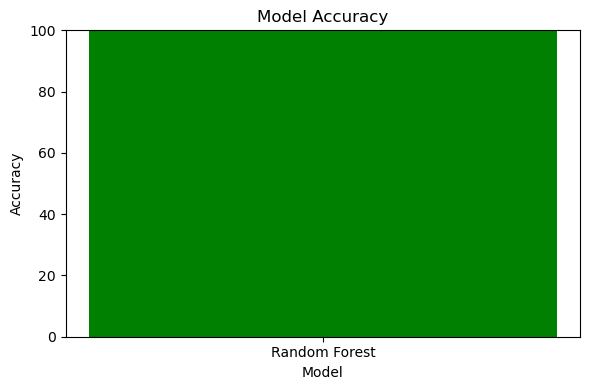

In [17]:
M.run_models()

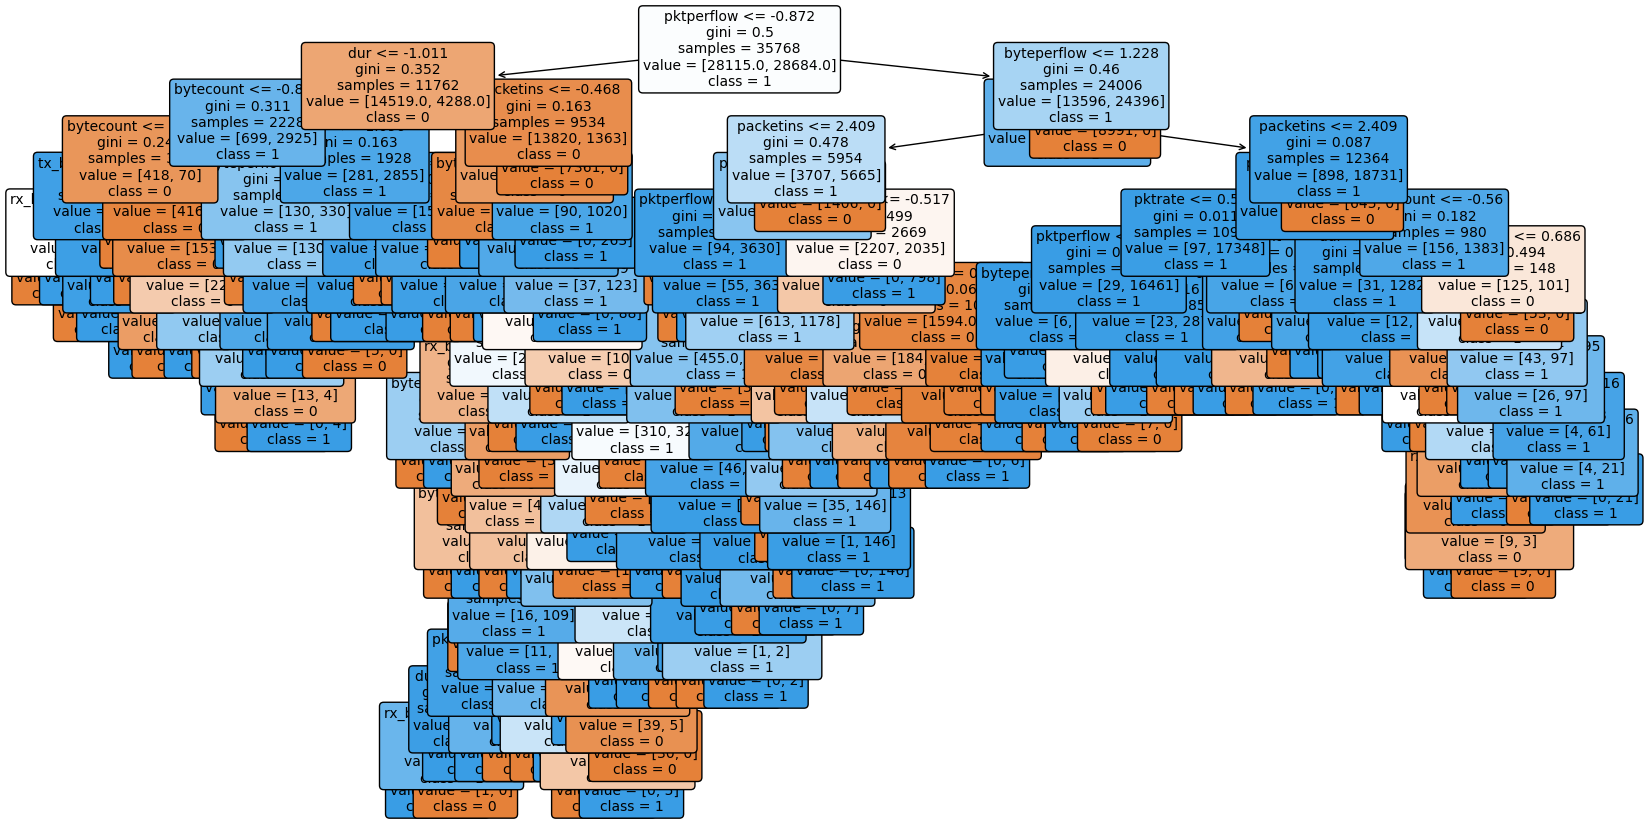

In [18]:
M.plot_single_tree(tree_index=0)